In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data preprocessing


In [8]:
data = pd.read_csv('META.csv')

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-18,26.801416,27.022808,26.635372,26.678255,26.647930,39253475
1,2014-11-19,26.676760,26.838314,26.431433,26.775988,26.745552,27844237
2,2014-11-20,26.489773,26.682243,26.481297,26.668282,26.637968,31267610
3,2014-11-21,27.006353,27.032782,26.754545,26.801416,26.770952,44485801
4,2014-11-24,26.808895,27.060705,26.707674,26.889673,26.859108,34127440


In [10]:
data.shape

(1237, 7)

In [11]:
data.isnull().values.sum()

0

In [12]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1237 non-null   object 
 1   Open       1237 non-null   float64
 2   High       1237 non-null   float64
 3   Low        1237 non-null   float64
 4   Close      1237 non-null   float64
 5   Adj Close  1237 non-null   float64
 6   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.8+ KB


In [14]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03
mean,44.381551,44.763818,43.994278,44.393428,44.342968,3.460532e+07
std,11.242412,11.357063,11.145976,11.258052,11.245255,1.710679e+07
min,24.664783,24.730902,24.311253,24.560070,24.532154,1.054400e+07
25%,35.853001,36.123501,35.500500,35.827499,35.786777,2.450800e+07
50%,45.398499,45.763748,45.169998,45.362000,45.310440,3.028400e+07
75%,54.637001,55.259998,54.189999,54.669498,54.607357,3.949000e+07
max,63.700001,64.463501,63.314751,64.378998,64.305824,2.232980e+08


In [15]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-18,26.801416,27.022808,26.635372,26.678255,26.647930,39253475
1,2014-11-19,26.676760,26.838314,26.431433,26.775988,26.745552,27844237
2,2014-11-20,26.489773,26.682243,26.481297,26.668282,26.637968,31267610
3,2014-11-21,27.006353,27.032782,26.754545,26.801416,26.770952,44485801
4,2014-11-24,26.808895,27.060705,26.707674,26.889673,26.859108,34127440


In [16]:
training_data = data.iloc[:,1:2].values

In [17]:
training_data

array([[26.801416],
       [26.67676 ],
       [26.489773],
       ...,
       [61.02    ],
       [62.058498],
       [62.546501]])

In [18]:
training_data.shape, data.shape

((1237, 1), (1237, 7))

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)


In [21]:
X_train = []
y_train = []

for i in range(60, 1237):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
X_train

array([[0.05473603, 0.05154261, 0.0467524 , ..., 0.05192578, 0.05441673,
        0.0622088 ],
       [0.05154261, 0.0467524 , 0.05998609, ..., 0.05441673, 0.0622088 ,
        0.06665409],
       [0.0467524 , 0.05998609, 0.05492763, ..., 0.0622088 , 0.06665409,
        0.05971789],
       ...,
       [0.81997026, 0.8334837 , 0.81798488, ..., 0.90339493, 0.93366244,
        0.92102004],
       [0.8334837 , 0.81798488, 0.82556772, ..., 0.93366244, 0.92102004,
        0.93134402],
       [0.81798488, 0.82556772, 0.93600648, ..., 0.92102004, 0.93134402,
        0.95794815]])

In [23]:
y_train

array([0.06665409, 0.05971789, 0.05542582, ..., 0.93134402, 0.95794815,
       0.97044976])

In [24]:
X_train.shape

(1177, 60)

In [27]:
y_train.shape

(1177,)

In [ ]:
X_train = X_train.reshape(1177,60,1)

## Building a model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(60,1)),
    tf.keras.layers.LSTM(units =60, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units =60, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units =80, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units =120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 60)         │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 60, 60)         │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,641 (725.16 KB)

 Trainable params: 185,641 (725.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train,batch_size=32, epochs=100)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.1532
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0090
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0065
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0065
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0057
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0050
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0051
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0050
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0056
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0046
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0047
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0040
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0044
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0040
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - lo

In [ ]:
test_data = pd.read_csv('GOOG.csv')

In [ ]:
test_data.shape

(21, 7)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       21 non-null     object 
 1   Open       21 non-null     float64
 2   High       21 non-null     float64
 3   Low        21 non-null     float64
 4   Close      21 non-null     float64
 5   Adj Close  21 non-null     float64
 6   Volume     21 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
stock = test_data.iloc[:,1:2].values

In [ ]:
stock

array([[62.673   ],
       [62.612999],
       [62.392502],
       [62.118   ],
       [63.044998],
       [62.551498],
       [63.772499],
       [63.811501],
       [62.648499],
       [63.063999],
       [63.25    ],
       [63.822498],
       [64.644501],
       [64.473   ],
       [64.713997],
       [65.264   ],
       [65.158997],
       [65.      ],
       [64.703499],
       [64.875   ],
       [65.946999]])

In [ ]:
stock.shape

(21, 1)

In [ ]:
data_total = pd.concat([data['Open'], test_data['Open']], axis=0)
inputs = data_total[len(data_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i , 0])

X_test = np.array(X_test)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


In [ ]:
print(predicted_stock_price[10]), print(stock[10])

[60.591488]
[63.25]


(None, None)

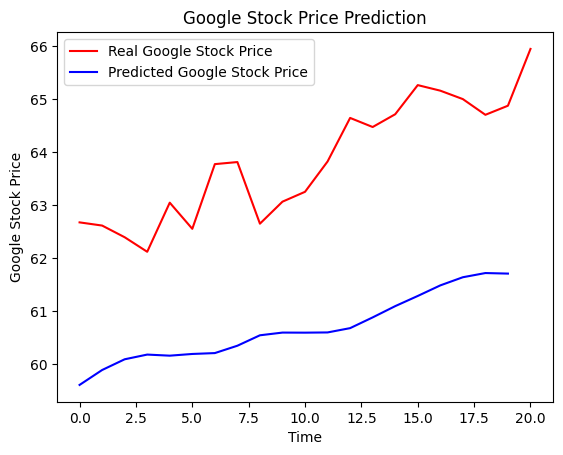

In [ ]:
plt.plot(stock, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()